# Car Model | Final Project
## Bachelor's degree in Economics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_model_fipe_xlsx = './car_model_fipe.xlsx'

df_car_model_fipe = pd.read_excel(car_model_fipe_xlsx, engine='openpyxl')

df_car_model_fipe.head()

,model,year_model,average_fipe_price,capacity_model,power_model,doors_model,mileage_1,mileage_2,mileage_3,mileage_4,mileage_5
0,Polo 1.0 Flex 12V 5p,2022,70403,10,12,5,56000,32000,91000,47000,49798
1,Polo 1.0 Flex 12V 5p,2021,68144,10,12,5,44000,48693,52000,106101,48693
2,Polo 1.0 Flex 12V 5p,2020,63417,10,12,5,124145,67000,69259,78000,98000
3,Polo 1.0 Flex 12V 5p,2019,61870,10,12,5,79000,74000,118590,57000,80550
4,Polo 1.0 Flex 12V 5p,2018,59891,10,12,5,108000,84660,68700,141300,82000


In [3]:
def calculate_average_mileage(df):
    def calculate_average_line(row):
        numeric_values = pd.to_numeric(row, errors='coerce').dropna()
        if not numeric_values.empty:
            return numeric_values.mean()
        else:
            return 'No information'
    mileage_columns = ['mileage_1', 'mileage_2', 'mileage_3', 'mileage_4', 'mileage_5']
    df_mileage = df[mileage_columns].replace('No information', np.nan)
    return df_mileage.apply(calculate_average_line, axis=1)

def add_average_mileage_to_df(df_car_model_fipe):
    df_car_model_fipe['average_mileage'] = calculate_average_mileage(df_car_model_fipe)
    df_car_model_fipe = df_car_model_fipe.drop(columns=['mileage_1', 'mileage_2', 'mileage_3', 'mileage_4', 'mileage_5'])
    return df_car_model_fipe

df_car_model_fipe = add_average_mileage_to_df(df_car_model_fipe)

C:\Users\USER\AppData\Local\Temp\ipykernel_54716\88458848.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_mileage = df[mileage_columns].replace('No information', np.nan)


In [4]:
df_car_model_fipe.head()

,model,year_model,average_fipe_price,capacity_model,power_model,doors_model,average_mileage
0,Polo 1.0 Flex 12V 5p,2022,70403,10,12,5,55159.6
1,Polo 1.0 Flex 12V 5p,2021,68144,10,12,5,59897.4
2,Polo 1.0 Flex 12V 5p,2020,63417,10,12,5,87280.8
3,Polo 1.0 Flex 12V 5p,2019,61870,10,12,5,81828.0
4,Polo 1.0 Flex 12V 5p,2018,59891,10,12,5,96932.0


In [5]:
from sklearn.model_selection import train_test_split

X = df_car_model_fipe.drop(columns=['average_fipe_price'])
y = df_car_model_fipe['average_fipe_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 
)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 158 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model            142 non-null    object
 1   year_model       142 non-null    int64 
 2   capacity_model   142 non-null    int64 
 3   power_model      142 non-null    int64 
 4   doors_model      142 non-null    int64 
 5   average_mileage  142 non-null    object
dtypes: int64(4), object(2)
memory usage: 7.8+ KB
None


In [6]:
cat_features = ['model', 'year_model', 'capacity_model', 'power_model', 'doors_model', 'average_mileage']

for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

X_train['average_mileage'] = X_train['average_mileage'].astype(str)
X_test['average_mileage'] = X_test['average_mileage'].astype(str)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 158 to 102
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   model            142 non-null    category
 1   year_model       142 non-null    category
 2   capacity_model   142 non-null    category
 3   power_model      142 non-null    category
 4   doors_model      142 non-null    category
 5   average_mileage  142 non-null    object  
dtypes: category(5), object(1)
memory usage: 6.0+ KB
None


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6]
}

from catboost import CatBoostRegressor

catboost = CatBoostRegressor(
    cat_features=cat_features,
    verbose=0,
    random_state=42
)

grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

best_model = grid_search.best_estimator_
print(f"Better parameters: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE of CatBoost: {mae}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   2.6s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   2.8s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   3.6s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   2.6s
[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   2.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   2.4s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   3.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   3.5s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   3.7s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   2.8s
[CV] END ........depth=4, iterations=200, learning_rate=0.05; total time=   5.2s
[CV] END ........depth=4, iterations=200, learnin

In [8]:
cat_features = ['model', 'year_model', 'capacity_model', 'power_model', 'doors_model', 'average_mileage']

for col in cat_features:
    df_car_model_fipe[col] = df_car_model_fipe[col].astype('category')

print(df_car_model_fipe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   model               178 non-null    category
 1   year_model          178 non-null    category
 2   average_fipe_price  178 non-null    int64   
 3   capacity_model      178 non-null    category
 4   power_model         178 non-null    category
 5   doors_model         178 non-null    category
 6   average_mileage     178 non-null    category
dtypes: category(6), int64(1)
memory usage: 10.6 KB
None


In [9]:
cols = ['model', 'year_model', 'capacity_model', 'power_model', 'doors_model', 'average_mileage']
df_car_model_fipe_predict = df_car_model_fipe[cols].copy()
df_car_model_fipe_predict['average_mileage'] = df_car_model_fipe_predict['average_mileage'].astype(str)

df_car_model_fipe_predict['average_fipe_price'] = df_car_model_fipe['average_fipe_price']

df_car_model_fipe_predict['expected_price_ai'] = best_model.predict(df_car_model_fipe_predict)

print("Simulated ads with price suggested by AI:")
print(df_car_model_fipe_predict)

Simulated ads with price suggested by AI:
                                      model year_model capacity_model  \
0                      Polo 1.0 Flex 12V 5p       2022             10   
1                      Polo 1.0 Flex 12V 5p       2021             10   
2                      Polo 1.0 Flex 12V 5p       2020             10   
3                      Polo 1.0 Flex 12V 5p       2019             10   
4                      Polo 1.0 Flex 12V 5p       2018             10   
..                                      ...        ...            ...   
173              Polo Track 1.0 Flex 12V 5p       2023             10   
174       Polo Track Robust 1.0 Flex 12V 5p       2025             10   
175       Polo Track Robust 1.0 Flex 12V 5p       2025             10   
176  Polo Track Rock in Rio 1.0 Flex 12V 5p       2025             10   
177  Polo Track Rock in Rio 1.0 Flex 12V 5p       2025             10   

    power_model doors_model average_mileage  average_fipe_price  \
0            1

In [10]:
print(best_model.feature_names_)

['model', 'year_model', 'capacity_model', 'power_model', 'doors_model', 'average_mileage']


In [11]:
def rate_fipe_price(expected_price_ai, average_fipe_price):
    diff = abs(expected_price_ai - average_fipe_price) / average_fipe_price * 100
    if diff <= 10:
        return "Fair" # 🟢
    elif diff <= 20:
        return "Moderate" # 🟡
    else:
        return "Expensive" # 🔴

df_car_model_fipe_predict['lighthouse_fipe'] = df_car_model_fipe_predict.apply(lambda x: rate_fipe_price(x['expected_price_ai'], x['average_fipe_price']), axis=1)

df_car_model_fipe_predict['anchor_price_fipe'] = df_car_model_fipe_predict['average_fipe_price'] * 1.15

def rate_fipe_anchor_price(anchor_price_fipe, average_fipe_price):
    diff = abs(anchor_price_fipe - average_fipe_price) / average_fipe_price * 100
    if diff <= 10:
        return "Fair" # 🟢
    elif diff <= 20:
        return "Moderate" # 🟡
    else:
        return "Expensive" # 🔴

df_car_model_fipe_predict['lighthouse_anchor_fipe'] = df_car_model_fipe_predict.apply(lambda x: rate_fipe_anchor_price(x['anchor_price_fipe'], x['average_fipe_price']), axis=1)

print("\nTraffic light ads:")
print(df_car_model_fipe_predict)


Traffic light ads:
                                      model year_model capacity_model  \
0                      Polo 1.0 Flex 12V 5p       2022             10   
1                      Polo 1.0 Flex 12V 5p       2021             10   
2                      Polo 1.0 Flex 12V 5p       2020             10   
3                      Polo 1.0 Flex 12V 5p       2019             10   
4                      Polo 1.0 Flex 12V 5p       2018             10   
..                                      ...        ...            ...   
173              Polo Track 1.0 Flex 12V 5p       2023             10   
174       Polo Track Robust 1.0 Flex 12V 5p       2025             10   
175       Polo Track Robust 1.0 Flex 12V 5p       2025             10   
176  Polo Track Rock in Rio 1.0 Flex 12V 5p       2025             10   
177  Polo Track Rock in Rio 1.0 Flex 12V 5p       2025             10   

    power_model doors_model average_mileage  average_fipe_price  \
0            12           5         

          Features  Importance (%)
3      power_model       51.930449
2   capacity_model       21.709393
1       year_model       14.905847
4      doors_model        8.662562
0            model        2.791749
5  average_mileage        0.000000


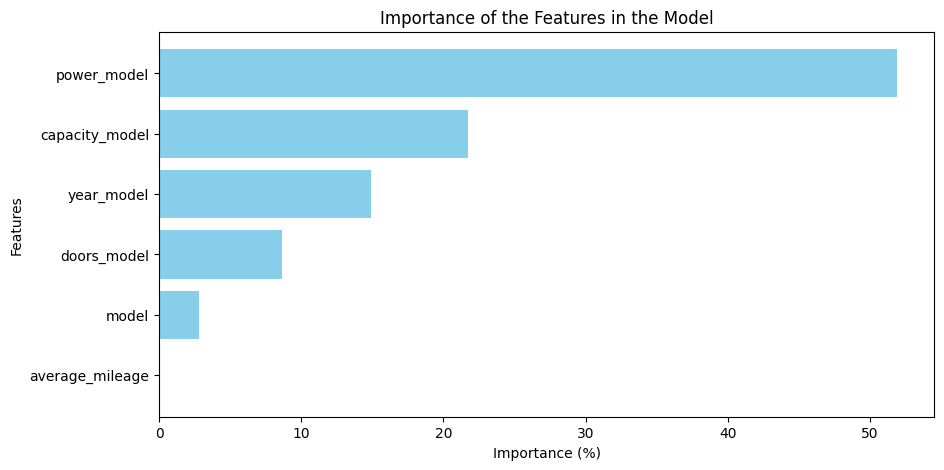

In [12]:
feature_importances = best_model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance (%)': (feature_importances / feature_importances.sum()) * 100
}).sort_values(by='Importance (%)', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 5))
plt.barh(importance_df['Features'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.ylabel('Features')
plt.title('Importance of the Features in the Model')
plt.gca().invert_yaxis()
plt.show()

In [13]:
df_car_model_fipe_predict.to_excel("car_model_AI_XAI.xlsx", index=False, engine='openpyxl')

print("Extraction completed. File saved.")

Extraction completed. File saved.
